# Instacart Exploratory Data Analysis

## Project Introduction

In this exploratory data analysis, we are going to be analyzing Instacart customers in 2017 on their order preferences to better understand their shopping behavior.

## Analysis Outline

##### Part A

•	Verify that values in the 'order_hour_of_day' columns in the orders table are in ranges from 0 to 23 and 'order_dow' ranges from 0 to 6.

•	Create a plot that shows how many people place orders for each hour of the day.

•	Create a plot that shows what day of the week people shop for groceries.

•	Create a plot that shows how long people wait until they place their next order.

##### Part B

•	Displayed the difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays using histograms.

•	Plotted the distribution for the number of total orders that customers make.

•	List the top 20 products that are most frequently ordered.

##### Part C

•	Calculated how large each customer's cart size is per order.

•	List of the top 20 items that are reordered most frequently by our customers.


## Step 1: Openings Data Files

Importing libraries that will be used for the analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Importing instacart_orders file

In [2]:
try:
    instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')
except:
    instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

Importing products file

In [3]:
try:
    products = pd.read_csv('products.csv', sep=';')
except:
    products = pd.read_csv('/datasets/products.csv', sep=';')

Importing order_products file

In [4]:
try:
    order_products = pd.read_csv('order_products.csv', sep=';')
except:
    order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

Importing aisles file


In [5]:
try:
    aisles = pd.read_csv('aisles.csv', sep=';')
except:
    aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

Importing departments file

In [6]:
try:
    departments = pd.read_csv('departments.csv', sep=';')
except:
    departments = pd.read_csv('/datasets/departments.csv', sep=';')

## Step 2: Pre-processing the Data

Verifying data for duplicates, null values, and incorrect data types

In [7]:
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In this DataFrame it has all the right data types and less than 10% missing values so we can say this DataFrame is set to be used

Now we are looking for duplicates and to remove them from the instacart_orders dataset

In [8]:
instacart_orders.duplicated().sum()

15

In [9]:
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Even though it is a small amount of duplicates compared to the total dataset it is still best to remove them

In [10]:
instacart_orders[(instacart_orders['order_dow'] == 4) & (instacart_orders['order_hour_of_day'] == 2)].duplicated().sum()

0

Checking for duplicates in instacart_orders DataFrame on Wednesdays at 2AM 

In [11]:
instacart_orders.drop_duplicates(inplace=True)

Removing all duplicate orders from instacart_orders DataFrame

In [12]:
instacart_orders.duplicated().sum()

0

Double checking for duplicates in the DataFrame

In [13]:
instacart_orders['order_id'].duplicated().sum()

0

Double checking for duplicates in the 'order_id' column

Next, we are looking for duplicates and to remove them from the products dataset

All the data types look good and little data is missing

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
products.duplicated().sum()

0

No duplicates are found which is a good sign

In [16]:
products['product_id'].duplicated().sum()

0

Checking for duplicates in the 'product_id' column and none were found

In [17]:
products['product_name'].duplicated().sum()

1257

After checking for duplicates in the 'product_name' column we have a noticable amount of duplicates. Since this column is an object type we can check to see if these are actual duplicates or a character casing issue.

In [18]:
products['product_name'].str.lower()

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

By using str.lower() method we turned all the string in this column to lowercase

In [19]:
products['product_name'].duplicated().sum()

1257

In [20]:
products[products['product_name'].notna()]['product_name'].str.lower().duplicated().sum()

104

After lowering the case of all entries in that column we have an increase in duplicates

In [21]:
products[~products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Checking for duplicate product names that aren't missing

Now we move on to the next dataset to search and remove duplicates from the order_products dataset. Since this dataset is so large we need to use the "show_counts=True" parameter to show all the rows

In [22]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [23]:
order_products.duplicated().sum()

0

Next, we move onto the aisles dataset to search for and remove all duplicates if possible

In [24]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [25]:
aisles.duplicated().sum()

0

Lastly, we need to clean the data for the departments dataset

In [26]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [27]:
departments.duplicated().sum()

0

### Exploring Missing Values

In [28]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Checking for missing values and one is found in the 'prouduct_name' column

In [29]:
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


By filtering the 'products_name' column we found the one column with missing values


In [30]:
print(products[products['aisle_id'] == 100]['product_name'].isna())

37       True
71       True
109      True
296      True
416      True
         ... 
49552    True
49574    True
49640    True
49663    True
49668    True
Name: product_name, Length: 1258, dtype: bool


By looking more into 'aisle_id' column it shows that the aisle is missing the same amount of values as the 'product_name' column. We can conclude that all the missing 'product_name' values are the same ones as in the 'aisle_id' 100. 

In [31]:
print(products[products['department_id'] == 21]['product_name'].isna())

37       True
71       True
109      True
296      True
416      True
         ... 
49552    True
49574    True
49640    True
49663    True
49668    True
Name: product_name, Length: 1258, dtype: bool


By looking more into 'department_id' column it shows that the department is missing the same amount of values as the 'product_name' column and the 'aisle_id' column. We can conclude that all the missing 'product_name' values are the same ones as in the 'department_id' 21. 

In [32]:
products['product_name'] = products['product_name'].fillna('unknown')

Renaming all the NaN values to 'unknown'

In [33]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [34]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id


In [35]:
products[products['product_name'] == 'unknown']

,product_id,product_name,aisle_id,department_id
37,38,unknown,100,21
71,72,unknown,100,21
109,110,unknown,100,21
296,297,unknown,100,21
416,417,unknown,100,21
...,...,...,...,...
49552,49553,unknown,100,21
49574,49575,unknown,100,21
49640,49641,unknown,100,21
49663,49664,unknown,100,21


Double checking for null values

In [36]:
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Checking for missing values in the instacart_orders dataframe

In [37]:
print(instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] > 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


After filtering the null values and those who are not ordering for the first time it resulted in an empty dataframe meaning that there are no null values in the days_since_prior_order column that are not first time customers

In [38]:
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [39]:
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


After looking for missing values in the 'order_products' DataFrame there are a lot of missing orders in the 'add_to_cart_order' column

In [40]:
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


After printing the minimun and maximum values from the 'add_to_cart_order' column it shows that the min value is 1 and the max value is 64

In [41]:
null_order_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].to_list()

Saved all order IDs with at least one missing value in 'add_to_cart_order' to null_order_id

In [42]:
orders_missing_cart_order = order_products[order_products['order_id'].isin(null_order_id)]

After saving orderIDs to null_order_id, we filtered the 'order_id' column in the order_products DataFrame with the new null_order_id list and saved the results to orders_missing_cart_order variable

In [43]:
orders_missing_cart_order.groupby('order_id')['order_id'].count().min()

65

In [44]:
orders_missing_cart_order.groupby('order_id').size().min()

65

When grouping the dataframe with the users with missing add_to_cart_orders, it shows that the minimum value of of their missing orders starts at 65. We know beforehand that the max value of add_to_cart_orders was 64, therefore we can conclude that there is a technical issue with the recording method after the add_to_cart_order reaches 64.

In [45]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')

Renamed all null rows to 999 to remove all the null values

In [46]:
print(order_products[order_products['add_to_cart_order'].isna()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Double checking for null values

In [47]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

Changing the column type to integer type

In [48]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Checking to see if the column data type has changed to an integer type

## Step 3: Data analysis

### Part: A

##### Part A-1: To verify 'order_hour_of_day' values are 0-23 and 'order_dow' are 0-6 

To do this I will be using the min and max values on both of these columns to see if they meet the requirements

In [49]:
print(instacart_orders['order_hour_of_day'].min())
print(instacart_orders['order_hour_of_day'].max())

0
23


In [50]:
print(instacart_orders['order_dow'].min())
print(instacart_orders['order_dow'].max())

0
6


Since the minimun and maximum values are within the value ranges it means that all the values are accurate and there are no outlier data points that need to be fixed

##### Part A-2: Create a plot that shows how many people placed orders for each hour of the day

First I am going to group the instacart_orders by 'order_hour_of_day' to separate the data results into each hour. Then I will count 'order_id' to show each transaction for the grouped hours.

In [51]:
hourly_orders = instacart_orders.groupby('order_hour_of_day')['order_id'].count()

To create this plot I will need to use matplotlib

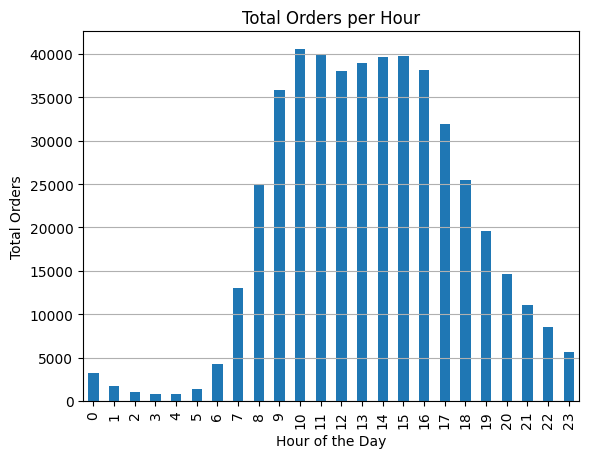

In [52]:
hourly_orders.plot(kind='bar',
                    x='order_hour_of_day',
                    y='order_id',
                    title='Total Orders per Hour',
                    xlabel='Hour of the Day',
                    ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

In this graph it shows that orders tend to start trending up at 7am generally when customers start to wake up and start to trend downward around 4pm. In this dataset it shows that Instacart customers tend to order the most during the 9-5 work day.

##### Part A-3: Create a plot that shows what day of the week people shop for groceries

First I am going to group the instacart_orders by 'order_dow' to separate the data into each day of the week. Then I will count 'order_id' to show each transaction for the grouped day.

In [53]:
dow_orders = instacart_orders.groupby('order_dow')['order_id'].count()

To create this plot I will need to use matplotlib

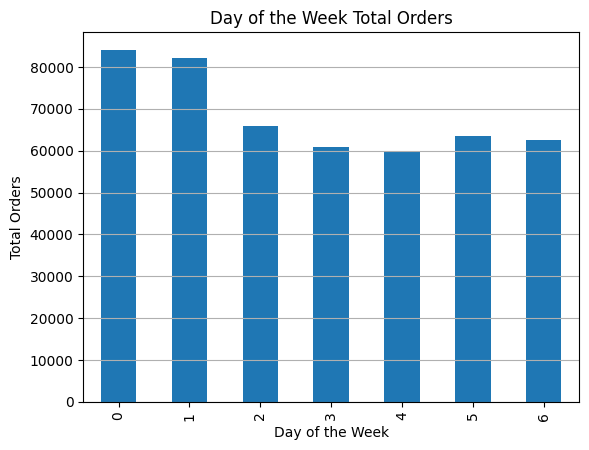

In [54]:
dow_orders.plot(kind='bar',
                x='order_dow',
                y='order_id',
                title='Day of the Week Total Orders',
                xlabel='Day of the Week',
                ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

On the day of the week axis it it would be safe to assum that 0 is correlated to Saturday. Saturdays are usually the busiest days more most businesses since customers have time off to run their errands like grocery shopping and this is also supported as 4 would be correlated to Wednesday as Wednesday is usuall the slowest day of the week for most businesses.

In this graphic it shows that the first two days of the week (Saturday and Sunday) are the most busy and that Instacart should allocate more resources into those days as those are the time customers are more likely to stop by and that day 4 (Wednesday) is the slowest day of the week

##### Part A-4: Create a plot that shows how long people wait until placing their next order

In [55]:
print(instacart_orders['days_since_prior_order'].mean())
print(instacart_orders['days_since_prior_order'].median())
print(instacart_orders['days_since_prior_order'].min())
print(instacart_orders['days_since_prior_order'].max())

11.101813900274362
7.0
0.0
30.0


From the mean, median, min, and max methods it shows that the median customer will wait about a week before they reorder. Also, I should note that since the average is significantly higher than the median it shows that there are some large outliers when it comes to small part of the customers.

In [56]:
days_unitl_reorder = instacart_orders['days_since_prior_order'].value_counts()

By using value_counts() it will separate the frequency of which days the customers will reorder

In [57]:
print(days_unitl_reorder.head(10))

days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
Name: count, dtype: int64


In this dataset it shows that most popular time frames that customers order is at least once a week or exactly once a month. 

This makes sense as when we compared the mean to the median that about half order at least once a week and that there is a large outlier of customers that take a lot longer to order skewing the average up from the median value.

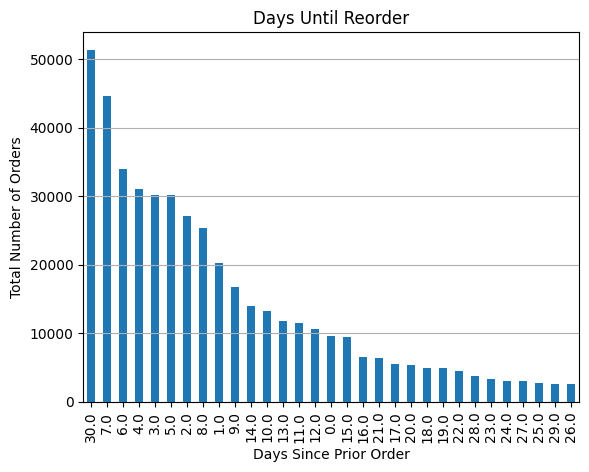

In [58]:
days_unitl_reorder.plot(kind='bar',
                         title='Days Until Reorder',
                         xlabel='Days Since Prior Order',
                         ylabel='Total Number of Orders')
plt.grid(axis='y')
plt.show()

In this graphic it shows that a heavy majority of customers either reorder on Instacart within 7 days or they order exactly once a month

### Part: B

##### Part B-1: Finding the difference in hourly order sales volume between Wednesdays and Saturdays

In [59]:
wednesday = instacart_orders[instacart_orders['order_dow'] == 4]

First, I need to isolate the orders for just Wednesday

In [60]:
wed_hourly_orders = wednesday.groupby('order_hour_of_day')['order_id'].count()

Now we use the new wednesday variable and count the hourly orders

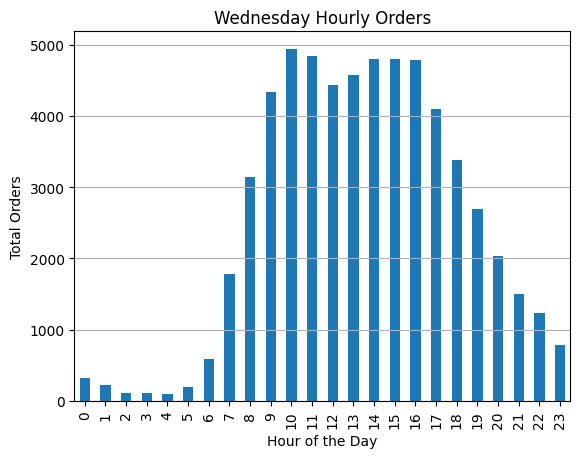

In [61]:
wed_hourly_orders.plot(kind='bar',
                       x='order_hour_of_day',
                       y='order_id',
                      title='Wednesday Hourly Orders',
                      xlabel='Hour of the Day',
                      ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

The distribution in orders on Wednesday looks very similar to the average overall with two peaks during the busiest hours

In [62]:
saturday = instacart_orders[instacart_orders['order_dow'] == 0]

Same as Wednesday I need to isolate the orders for just Saturday

In [63]:
sat_hourly_orders = saturday.groupby('order_hour_of_day')['order_id'].count()

After finding all the orders for Saturday we group the orders by the hour and count the number of orders in each hour

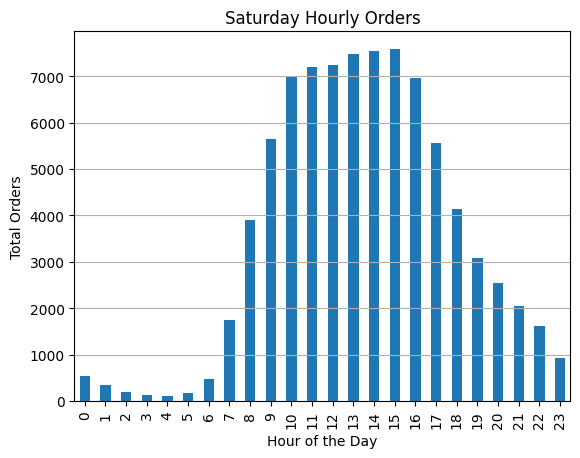

In [64]:
sat_hourly_orders.plot(kind='bar',
                       x='order_hour_of_day',
                       y='order_id',
                      title='Saturday Hourly Orders',
                      xlabel='Hour of the Day',
                      ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

Unlike the graph for Wednesday, the Saturday graph has one peak in orders instead of two peaks in the Wednesday graph.
Also the volume of orders is noticeably higher throughout the day

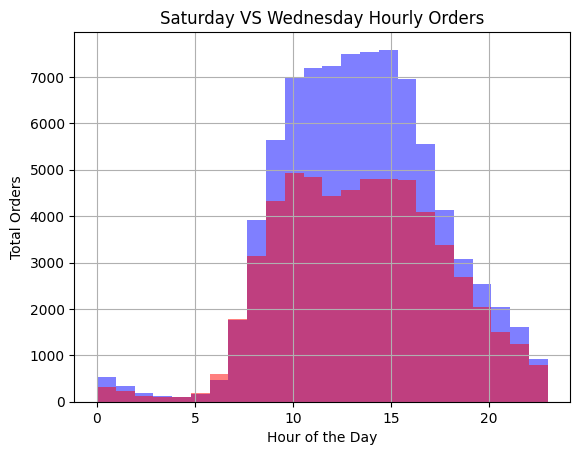

In [65]:
instacart_orders[instacart_orders['order_dow'] == 0]['order_hour_of_day'].hist(alpha=.5,
                                                                               bins=24,
                                                                               color='blue')
instacart_orders[instacart_orders['order_dow'] == 4]['order_hour_of_day'].hist(alpha=.5,
                                                                               bins=24,
                                                                               color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
 
plt.title('Saturday VS Wednesday Hourly Orders')
plt.show()

When we overlay the two graphs for Saturday and Wednesday it looks like Saturday clealy does more volume in orders compared to Wednesday. This difference can been seen especially towards the peak hours of the day.

##### Part B-2: Customer order distribution plot

In [66]:
customer_order_freq = instacart_orders.groupby('user_id')['order_number'].count()

First, I grouped all the customers by 'user_id' and added all their 'order_numbers' and saved it under the variable 'customer_order_freq'

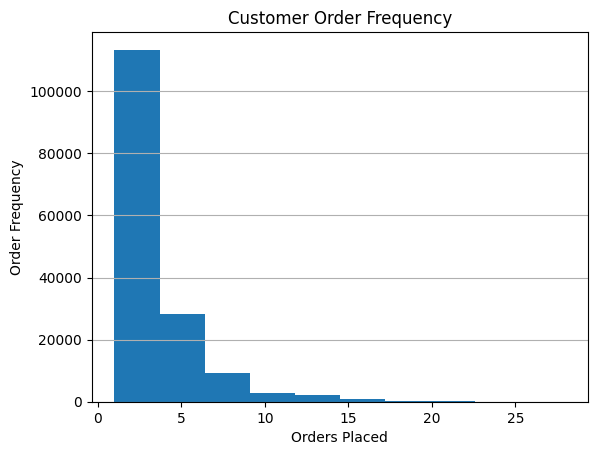

In [67]:
customer_order_freq.plot(kind='hist',
                         title='Customer Order Frequency',
                         xlabel='Orders Placed',
                         ylabel='Order Frequency')
plt.grid(axis='y')
plt.show()

In this graphic it shows that most customers place less than 25 orders

##### Part B-3: Top 20 Products

In [68]:
product_merged = order_products.merge(products,
                                      on='product_id')

First, I need to to merge two DataFrames that contained the same product ids to get the product name

In [69]:
product_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int32 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 225.4+ MB


I used info to check if the merge changed any of the data types and as expected nothing changed

In [70]:
top_20_list = product_merged.groupby(['product_name','product_id'])['order_id'].count().sort_values(ascending=False).head(20)

To find the top 20 products I grouped the products by 'product_name' and 'product_id', counted each order in those groups, and sorted the values from highest to lowest. By getting the first 20 values will be the top 20 products since it is sorted from largest value to lowest value.

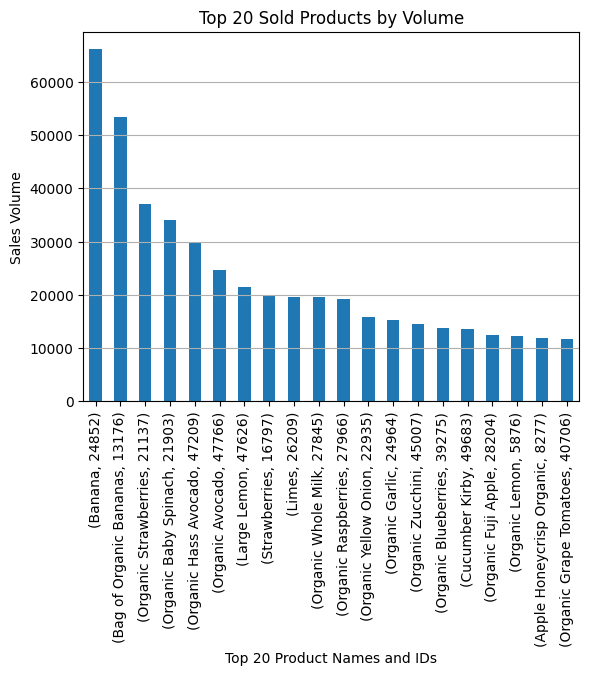

In [71]:
top_20_list.plot(kind='bar',
                 title='Top 20 Sold Products by Volume',
                 xlabel='Top 20 Product Names and IDs',
                 ylabel= 'Sales Volume')
plt.grid(axis='y')
plt.show()

Based on the top 20 products sold a majority of the volume sold seems to be fruits and vegetables

### Part: C

##### Part C-1: Cart size per order

First, I have to merge the DataFrames I will need on this plor. I will merge the DataFrames on the 'order_id' column as that is the column that both DataFrames have in common.

In [72]:
cart_size_merged = order_products.merge(instacart_orders,
                                        on='order_id')

Then I need to check if all the columns I need will be there and that there is no change in their data type

In [73]:
cart_size_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int32  
 3   reordered               int64  
 4   user_id                 int64  
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
dtypes: float64(1), int32(1), int64(7)
memory usage: 294.7 MB


I created the 'customer_cart_size' variable to group the the dataset by order and how many products are in each order

In [74]:
customer_cart_size = cart_size_merged.groupby('order_id')['product_id'].count()

In [75]:
customer_cart_size.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Looking more into the customer_cart_size, it shows that the average cart size is about 10 items, and the median cart size is 8 items. Since the average is noticeably larger than the median it shows that there are some large outliers cart sizes increasing the average. Looking at the bell chart it shows that the max cart size is 127 orders.

Now we can find the frequency of each cart size per order and graph the top 20 most popular cart sizes

In [76]:
customer_cart_size = customer_cart_size.value_counts().head(20)

After finding the frequency of each order size we can now graph the results to see the most popular cart size

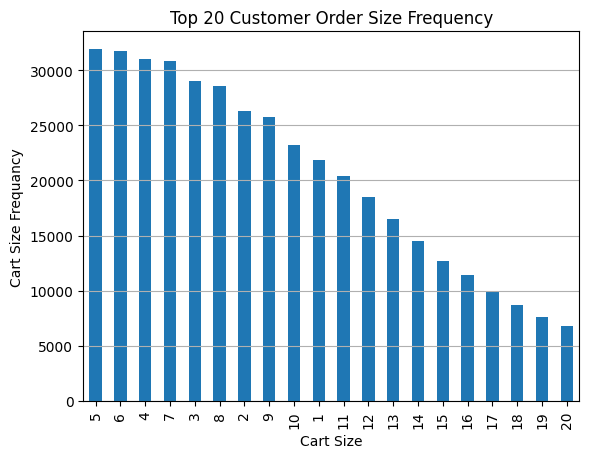

In [77]:
customer_cart_size.plot(kind='bar',
                        title='Top 20 Customer Order Size Frequency',
                        xlabel='Cart Size',
                        ylabel='Cart Size Frequancy')
plt.grid(axis='y')
plt.show()

Based on the plot, it displays that the most popular cart sizes are 5, 6, 4, 7, and 3.

##### Part C-2: What are the top 20 items that are reordered most frequently?

In [78]:
top_20_reorders = product_merged.groupby(['product_name', 'product_id'])['reordered'].sum().sort_values(ascending=False).head(20)

Firstly, I grouped the products by name and id from the custom DataFrame 'product_merged' we crated earlier. Then I added all the reorder values in each order together. Since reordered items will show as a 1 if it is reordered and 0 if it is not then we can tally up the about of reorders per product and get the most popular reordered item from there. Lastly, I sorted the values from largest to smallest and saved the top 20 values. Since the items are sorted from highest to lowest the first 20 items will be the 20 most popular reordered items.

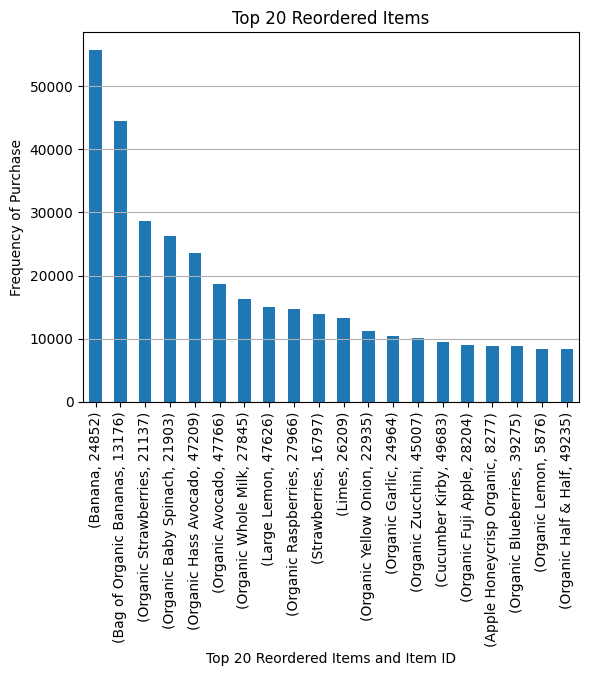

In [79]:
top_20_reorders.plot(kind='bar',
                     title='Top 20 Reordered Items',
                     xlabel='Top 20 Reordered Items and Item ID',
                     ylabel='Frequency of Purchase')
plt.grid(axis='y')
plt.show()

Many of the items on this list are also items on the top 20 sold items as well showing that the top 20 sold items are also the most repurchased items

### Conclusion

This analysis of Instacart's 2017 data shows that most customers are weekly shoppers or once a month shoppers. These customers often come to buy fruits and vegetables indicating that the produce Instacart sells are possibly of high quality and could possibly sold for a higher premium. Instacart customers also tend to order more on the weekends and show that there could be more room for improvement on the weekdays. Possibly, if there were more sales during the slower days like Wednesday it could attrack more customers and have them be more frequent customers.